<a href="https://colab.research.google.com/github/Shreeranga1/DecisionTree/blob/main/TreePractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np

In [3]:
df_employee=pd.read_csv("/content/sample_data/Employee-Attrition.csv")
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,Life Sciences,2,Female,3,2,Sales Executive,4,5993,8,Yes,11,3,6
1,49,No,Travel_Frequently,Research & Development,8,Life Sciences,3,Male,2,2,Research Scientist,2,5130,1,No,23,4,10
2,37,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,2090,6,Yes,15,3,0
3,33,No,Travel_Frequently,Research & Development,3,Life Sciences,4,Female,3,1,Research Scientist,3,2909,1,Yes,11,3,8
4,27,No,Travel_Rarely,Research & Development,2,Medical,1,Male,3,1,Laboratory Technician,2,3468,9,No,12,3,2


In [4]:
df_employee.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
YearsAtCompany              int64
dtype: object

In [5]:
df_employee.shape

(1470, 18)

check for outlier

In [13]:
import matplotlib.pyplot as plt

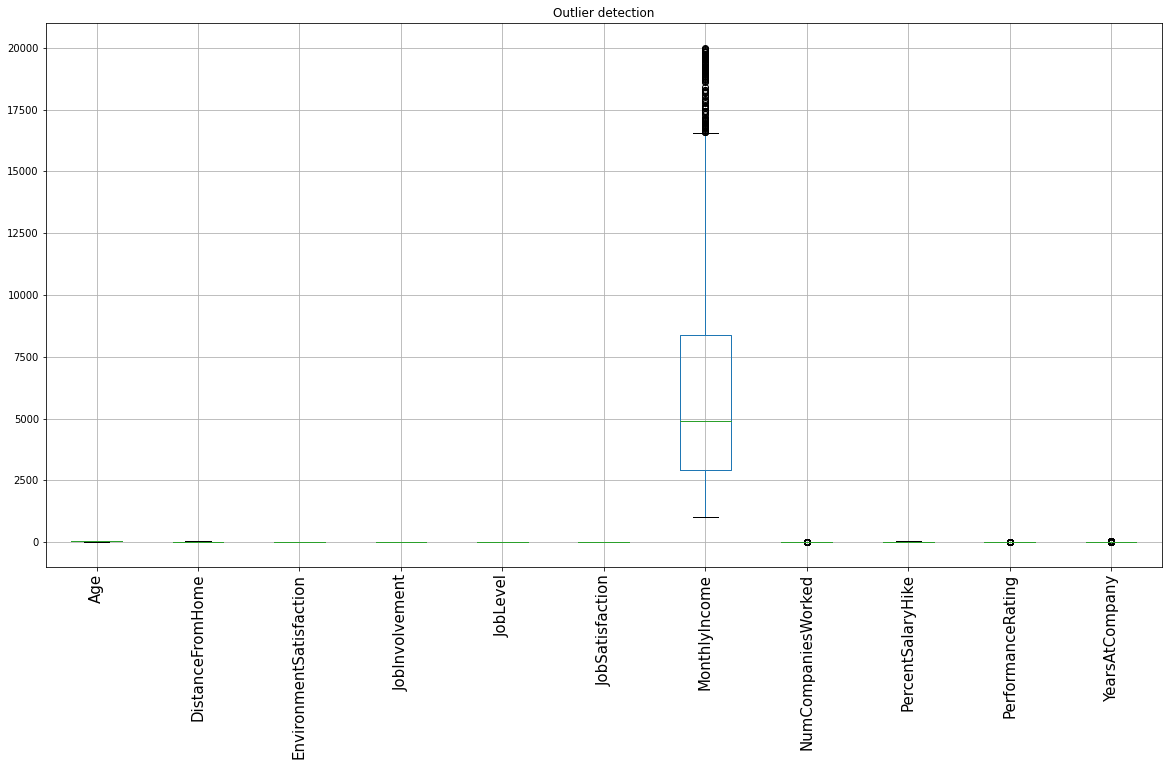

In [15]:
df_employee.boxplot(figsize=(20,10))
plt.title("Outlier detection")
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

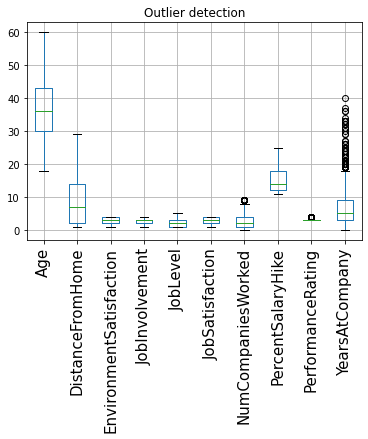

In [18]:
df_employee[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany']].boxplot()
plt.title("Outlier detection")
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

Removal of outliers using Quantile method

In [23]:
# calculate the first quartile
Q1 = df_employee.quantile(0.25)

#calculate the third quartile
Q3 = df_employee.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the dataframe
df_employee = df_employee[~((df_employee < (Q1 - 1.5 * IQR)) | (df_employee > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the row index
df_employee = df_employee.reset_index(drop=True)

# check the shape of the data
df_employee.shape

(1059, 18)

Decesion Tree

In [24]:
df_target=df_employee.Attrition
df_feature=df_employee.drop('Attrition',axis=1)

In [25]:
df_target.replace({'Yes':1,'No':0},inplace=True)

In [26]:
df_target.astype('int')

0       1
1       1
2       0
3       0
4       0
       ..
1054    0
1055    0
1056    0
1057    0
1058    0
Name: Attrition, Length: 1059, dtype: int64

Filter num and cat variable 

In [27]:
df_num=df_feature.select_dtypes(include=[np.number])
df_num.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

In [28]:
df_cat=df_feature.select_dtypes(include=[np.object])
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'OverTime'],
      dtype='object')

Dummy var

In [29]:
dummy_var=pd.get_dummies(data=df_cat,drop_first=True)

In [30]:
dummy_var

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1055,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
1056,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1057,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [31]:
X=pd.concat([df_num,dummy_var],axis=1)
X.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1,2,3,2,4,5993,8,11,3,6,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,37,2,4,2,1,3,2090,6,15,3,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
2,33,3,4,3,1,3,2909,1,11,3,8,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,32,2,4,3,1,4,3068,0,13,3,7,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,36,27,3,3,2,3,5237,6,13,3,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [33]:
X_subset=X.iloc[:,[2,6]]
X_subset

,EnvironmentSatisfaction,MonthlyIncome
0,2,5993
1,4,2090
2,4,2909
3,4,3068
4,3,5237
...,...,...
1054,4,2966
1055,3,2571
1056,4,9991
1057,4,5390


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_subset,df_target,random_state=10,test_size=0.3)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
decision_tree = DecisionTreeClassifier(random_state=10)

In [38]:
decision_tree = decision_tree.fit(X_train, y_train)

In [39]:
y_pred = decision_tree.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,